In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import re
import warnings
from requests.exceptions import RequestException
warnings.filterwarnings('ignore')

## Problem Statement

Online shoppers in Nigeria often face difficulties comparing prices and discounts across similar products on Jumia. This project aims to analyze Jumia product pricing, discounts, and customer ratings to uncover insights that can help consumers make smarter purchase decisions and guide sellers in setting competitive prices.

## Objectives

1. Scrape product data from Jumia (name, category, price, old price, and rating).

2. Clean and preprocess the dataset(remove symbols, fix data types, handle missing values).

3. Analyze and visualize price, discount, and rating distributions.

4. Identify categories with the highest discounts and best ratings

5. Derive business insights from data trends

In [5]:
# Define categories and base URLs
# -----------------------------------------
categories = {
    "phones-tablets": "https://www.jumia.com.ng/phones-tablets/",
    "electronics": "https://www.jumia.com.ng/electronics/",
    "computing": "https://www.jumia.com.ng/computing/",
    "home-office": "https://www.jumia.com.ng/home-office/",
    "health-beauty": "https://www.jumia.com.ng/health-beauty/",
    "fashion-men": "https://www.jumia.com.ng/men-fashion/",
    "fashion-women": "https://www.jumia.com.ng/women-fashion/",
    "groceries": "https://www.jumia.com.ng/groceries/",
    "supermarket": "https://www.jumia.com.ng/supermarket/",
    "baby-products": "https://www.jumia.com.ng/baby-products/",
    "gaming": "https://www.jumia.com.ng/gaming/",
    "sport-fitness": "https://www.jumia.com.ng/sporting-goods/",
    "automobile": "https://www.jumia.com.ng/automobile/",
    "garden-outdoors": "https://www.jumia.com.ng/garden-outdoors/",
    "pet-supplies": "https://www.jumia.com.ng/pet-supplies/",
}

# -----------------------------------------
# Step 2: Headers (pretend to be a browser)
# -----------------------------------------
headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/120.0.0.0 Safari/537.36"
    ),
    "Accept-Language": "en-US,en;q=0.9",
}

# -----------------------------------------
# Step 3: Helper function to scrape one category
# -----------------------------------------
def scrape_category(category_name, url, pages=2):
    all_products = []

    for page in range(1, pages + 1):
        page_url = f"{url}?page={page}#catalog-listing"
        print(f"\n📄 Scraping {category_name} - Page {page}...")

        try:
            response = requests.get(page_url, headers=headers, timeout=10)
            if response.status_code != 200:
                print(f"⚠️ Skipping {page_url} (Status {response.status_code})")
                continue

            soup = BeautifulSoup(response.text, "html.parser")
            products = soup.find_all("article", class_="prd _fb col c-prd")

            if not products:
                print("❌ No products found on this page.")
                break

            for product in products:
                name_tag = product.find("h3", class_="name")
                name = name_tag.text.strip() if name_tag else None

                # Try to guess brand from product name
                if name:
                    brand_guess = name.split()[0] if len(name.split()) > 0 else None
                else:
                    brand_guess = None

                price = product.find("div", class_="prc")
                old_price = product.find("div", class_="old")
                rating = product.find("div", class_="stars _s")
                link = product.find("a", href=True)

                all_products.append({
                    "Category": category_name,
                    "Name": name,
                    "Brand": brand_guess,
                    "Price": price.text.strip() if price else None,
                    "Old_Price": old_price.text.strip() if old_price else None,
                    "Rating": rating.text.strip() if rating else None,
                    "Link": "https://www.jumia.com.ng" + link["href"] if link else None
                })

            print(f"✅ Page {page} done! ({len(products)} products)")
            time.sleep(3)

        except RequestException as e:
            print(f"🚫 Error fetching {page_url}: {e}")
            time.sleep(5)
            continue

    return all_products

# -----------------------------------------
# Step 4: Loop through all categories
# -----------------------------------------
all_data = []

for cat_name, cat_url in categories.items():
    print(f"\n🔹 Starting category: {cat_name.upper()}")
    data = scrape_category(cat_name, cat_url, pages=2)
    all_data.extend(data)

# -----------------------------------------
# Step 5: Save to CSV
# -----------------------------------------
if all_data:
    df = pd.DataFrame(all_data)
    df.to_csv("jumia_products_with_brands.csv", index=False, encoding="utf-8-sig")
    print("\n✅ Data saved successfully to 'jumia_products_with_brands.csv'")
else:
    print("\n⚠️ No data scraped. Please check your connection or try again later.")



🔹 Starting category: PHONES-TABLETS

📄 Scraping phones-tablets - Page 1...
✅ Page 1 done! (40 products)

📄 Scraping phones-tablets - Page 2...
✅ Page 2 done! (40 products)

🔹 Starting category: ELECTRONICS

📄 Scraping electronics - Page 1...
✅ Page 1 done! (40 products)

📄 Scraping electronics - Page 2...
✅ Page 2 done! (40 products)

🔹 Starting category: COMPUTING

📄 Scraping computing - Page 1...
✅ Page 1 done! (40 products)

📄 Scraping computing - Page 2...
✅ Page 2 done! (40 products)

🔹 Starting category: HOME-OFFICE

📄 Scraping home-office - Page 1...
✅ Page 1 done! (40 products)

📄 Scraping home-office - Page 2...
✅ Page 2 done! (40 products)

🔹 Starting category: HEALTH-BEAUTY

📄 Scraping health-beauty - Page 1...
✅ Page 1 done! (40 products)

📄 Scraping health-beauty - Page 2...
✅ Page 2 done! (40 products)

🔹 Starting category: FASHION-MEN

📄 Scraping fashion-men - Page 1...
❌ No products found on this page.

🔹 Starting category: FASHION-WOMEN

📄 Scraping fashion-women - Pag

In [6]:
df.head()

,Category,Name,Brand,Price,Old_Price,Rating,Link
0,phones-tablets,Ace Elec 20000 MAh Utra Slim Portable Power Ba...,Ace,"₦ 6,908",None,3.7 out of 5,https://www.jumia.com.ng/customer/account/logi...
1,phones-tablets,EASYPIE EasyPie 20000mAh Dual Fast Charge 64W ...,EASYPIE,"₦ 6,960","₦ 8,618",3.6 out of 5,https://www.jumia.com.ng/customer/account/logi...
2,phones-tablets,Philly 20000mAh Power Charging Bank Portable C...,Philly,"₦ 6,946","₦ 12,971",3.6 out of 5,https://www.jumia.com.ng/customer/account/logi...
3,phones-tablets,VIC ♛20000mAh Power Banks 74Wh Portable Charge...,VIC,"₦ 4,910","₦ 18,830",3.4 out of 5,https://www.jumia.com.ng/customer/account/logi...
4,phones-tablets,Oraimo Traveler 12 20000mAh 12W Power Bank,Oraimo,"₦ 13,635","₦ 22,469",4 out of 5,https://www.jumia.com.ng/customer/account/logi...


In [8]:
df.shape

(811, 7)

In [9]:
df.shape

(811, 7)

In [10]:
df.describe()

,Category,Name,Brand,Price,Old_Price,Rating,Link
count,811,811,811,811,644,759,811
unique,11,781,381,633,443,25,811
top,phones-tablets,Adjustable Jump Skipping Rope Cable For Adults...,NIVEA,"₦ 7,999","₦ 10,000",4 out of 5,https://www.jumia.com.ng/customer/account/logi...
freq,80,4,29,11,23,84,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Category   811 non-null    object
 1   Name       811 non-null    object
 2   Brand      811 non-null    object
 3   Price      811 non-null    object
 4   Old_Price  644 non-null    object
 5   Rating     759 non-null    object
 6   Link       811 non-null    object
dtypes: object(7)
memory usage: 44.5+ KB


In [12]:
df.isnull().sum()

Category       0
Name           0
Brand          0
Price          0
Old_Price    167
Rating        52
Link           0
dtype: int64

## Data Cleaning

In [15]:
# Remove Naira sign and comma
df['Price'] = (df['Price'].astype(str).str.replace('₦', '', regex=False).str.replace(',', '', regex=False).str.strip())
df['Old_Price'] = (df['Old_Price'].astype(str).str.replace('₦', '', regex=False).str.replace(',', '', regex=False).str.strip())

# Convert to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Old_Price'] = pd.to_numeric(df['Old_Price'], errors='coerce')

# fill missing Old_Price with Price
df['Old_Price'].fillna(df['Price'], inplace=True)

# if Price was NaN but Old_Price exist
df['Price'].fillna(df['Old_Price'], inplace=True)

# calculate discount
df['Discount'] = ((df['Old_Price'] - df['Price']) / df['Old_Price']) * 100
df['Discount'] = df['Discount'].round(2)

# replace NaN in Discount (no discount) with 0
df['Discount'].fillna(0, inplace=True)

In [16]:
df.head()

,Category,Name,Brand,Price,Old_Price,Rating,Link,Discount
0,phones-tablets,Ace Elec 20000 MAh Utra Slim Portable Power Ba...,Ace,6908.0,6908.0,3.7 out of 5,https://www.jumia.com.ng/customer/account/logi...,0.00
1,phones-tablets,EASYPIE EasyPie 20000mAh Dual Fast Charge 64W ...,EASYPIE,6960.0,8618.0,3.6 out of 5,https://www.jumia.com.ng/customer/account/logi...,19.24
2,phones-tablets,Philly 20000mAh Power Charging Bank Portable C...,Philly,6946.0,12971.0,3.6 out of 5,https://www.jumia.com.ng/customer/account/logi...,46.45
3,phones-tablets,VIC ♛20000mAh Power Banks 74Wh Portable Charge...,VIC,4910.0,18830.0,3.4 out of 5,https://www.jumia.com.ng/customer/account/logi...,73.92
4,phones-tablets,Oraimo Traveler 12 20000mAh 12W Power Bank,Oraimo,13635.0,22469.0,4 out of 5,https://www.jumia.com.ng/customer/account/logi...,39.32


In [17]:
df.isnull().sum()

Category      0
Name          0
Brand         0
Price        12
Old_Price    12
Rating       52
Link          0
Discount      0
dtype: int64

In [18]:
df[df['Price'].isna() | df['Old_Price'].isna()]

,Category,Name,Brand,Price,Old_Price,Rating,Link,Discount
132,electronics,P9 Wireless Headset-blue,P9,NaN,NaN,3.7 out of 5,https://www.jumia.com.ng/fashion-p9-wireless-h...,0.0
381,health-beauty,PAK NUTRITION Creatine Monohydrate Powder - Le...,PAK,NaN,NaN,4.3 out of 5,https://www.jumia.com.ng/pak-nutrition-creatin...,0.0
572,sport-fitness,Singleton Multicoloured 3-in-1 Men's Singlets,Singleton,NaN,NaN,4.1 out of 5,https://www.jumia.com.ng/singleton-multicolour...,0.0
574,sport-fitness,All-Season Universal Large Capacity Insulated ...,All-Season,NaN,NaN,4 out of 5,https://www.jumia.com.ng/generic-all-season-un...,0.0
595,sport-fitness,Singleton Multicoloured 3-in-1 Men's Singlets,Singleton,NaN,NaN,4.1 out of 5,https://www.jumia.com.ng/singleton-multicolour...,0.0
624,sport-fitness,3-in-1 Premium Singlet Men's (UnderWear) – Bla...,3-in-1,NaN,NaN,3.5 out of 5,https://www.jumia.com.ng/fashion-3-in-1-premiu...,0.0
675,automobile,50-500pcs Set Universal Plastic Clips For Car ...,50-500pcs,NaN,NaN,4.6 out of 5,https://www.jumia.com.ng/generic-50-500pcs-set...,0.0
710,automobile,Cover Car Body Cover /Sun Anti Dust Rain Cover...,Cover,NaN,NaN,5 out of 5,https://www.jumia.com.ng/generic-cover-car-bod...,0.0
753,pet-supplies,Reflective Collar Cats Puppy And Small Dogs Wi...,Reflective,NaN,NaN,4 out of 5,https://www.jumia.com.ng/generic-reflective-co...,0.0
759,pet-supplies,TD Dog&Cat Bowl Stainless Feeder Anti-slip Aut...,TD,NaN,NaN,4.4 out of 5,https://www.jumia.com.ng/td-dogcat-bowl-stainl...,0.0


In [19]:
df.dropna(subset=['Price', 'Old_Price'], how='all', inplace=True)

In [20]:
df.isnull().sum()

Category      0
Name          0
Brand         0
Price         0
Old_Price     0
Rating       51
Link          0
Discount      0
dtype: int64

In [21]:
# chaning Rating into numeric
def clean_rating(text):
    text = str(text).strip()
    match = re.search(r"(\d+(\.\d+)?)", text)
    if match:
        return float(match.group(1))
    return None
df['Rating'] = df['Rating'].apply(clean_rating)

In [22]:
df.head()

,Category,Name,Brand,Price,Old_Price,Rating,Link,Discount
0,phones-tablets,Ace Elec 20000 MAh Utra Slim Portable Power Ba...,Ace,6908.0,6908.0,3.7,https://www.jumia.com.ng/customer/account/logi...,0.00
1,phones-tablets,EASYPIE EasyPie 20000mAh Dual Fast Charge 64W ...,EASYPIE,6960.0,8618.0,3.6,https://www.jumia.com.ng/customer/account/logi...,19.24
2,phones-tablets,Philly 20000mAh Power Charging Bank Portable C...,Philly,6946.0,12971.0,3.6,https://www.jumia.com.ng/customer/account/logi...,46.45
3,phones-tablets,VIC ♛20000mAh Power Banks 74Wh Portable Charge...,VIC,4910.0,18830.0,3.4,https://www.jumia.com.ng/customer/account/logi...,73.92
4,phones-tablets,Oraimo Traveler 12 20000mAh 12W Power Bank,Oraimo,13635.0,22469.0,4.0,https://www.jumia.com.ng/customer/account/logi...,39.32


In [24]:
df.isnull().sum()

Category      0
Name          0
Brand         0
Price         0
Old_Price     0
Rating       51
Link          0
Discount      0
dtype: int64

In [26]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [28]:
df['Rating'].describe()

count    748.000000
mean       4.048529
std        0.536647
min        1.000000
25%        3.800000
50%        4.100000
75%        4.400000
max        5.000000
Name: Rating, dtype: float64

In [29]:
df['Price'].describe()

count    7.990000e+02
mean     2.780855e+04
std      8.914565e+04
min      3.540000e+02
25%      5.100000e+03
50%      8.027000e+03
75%      1.850000e+04
max      2.000000e+06
Name: Price, dtype: float64

In [31]:
# saving a backup of links
links = df['Link'].copy()

df = df.drop(columns=['Link'])

In [32]:
df.head()

,Category,Name,Brand,Price,Old_Price,Rating,Discount
0,phones-tablets,Ace Elec 20000 MAh Utra Slim Portable Power Ba...,Ace,6908.0,6908.0,3.7,0.00
1,phones-tablets,EASYPIE EasyPie 20000mAh Dual Fast Charge 64W ...,EASYPIE,6960.0,8618.0,3.6,19.24
2,phones-tablets,Philly 20000mAh Power Charging Bank Portable C...,Philly,6946.0,12971.0,3.6,46.45
3,phones-tablets,VIC ♛20000mAh Power Banks 74Wh Portable Charge...,VIC,4910.0,18830.0,3.4,73.92
4,phones-tablets,Oraimo Traveler 12 20000mAh 12W Power Bank,Oraimo,13635.0,22469.0,4.0,39.32


## Price Distribution

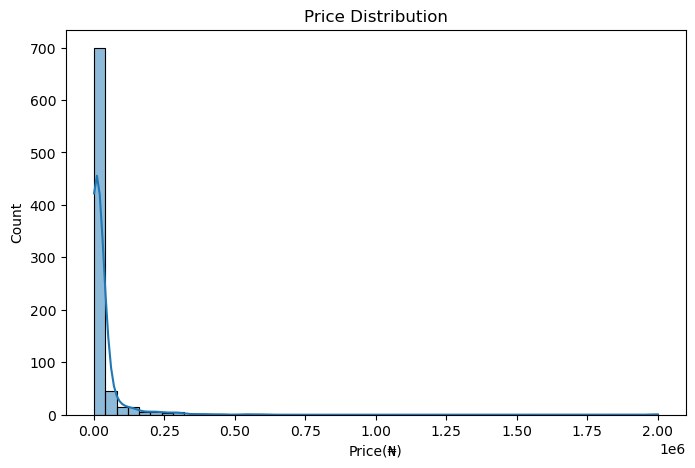

Average Discount 30.86 %


In [44]:
# price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price(₦)')
plt.ylabel('Count')
plt.show()

print('Average Discount', round(df['Discount'].mean (), 2), '%')

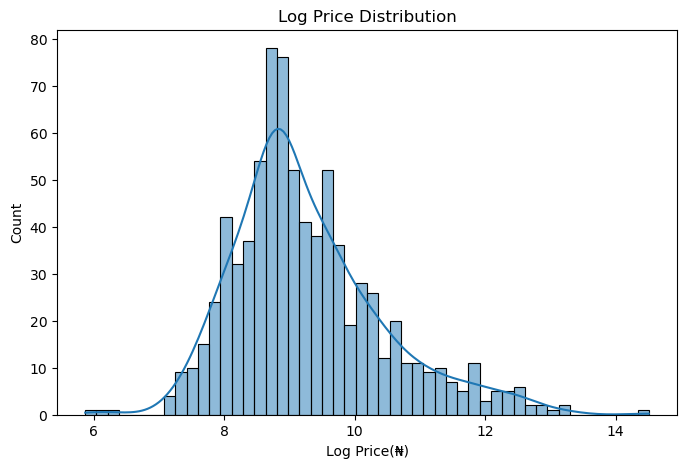

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'].apply(lambda x: np.log1p(x)), bins=50, kde=True)
plt.title('Log Price Distribution')
plt.xlabel('Log Price(₦)')
plt.ylabel('Count')
plt.show()

## Discount Distribution

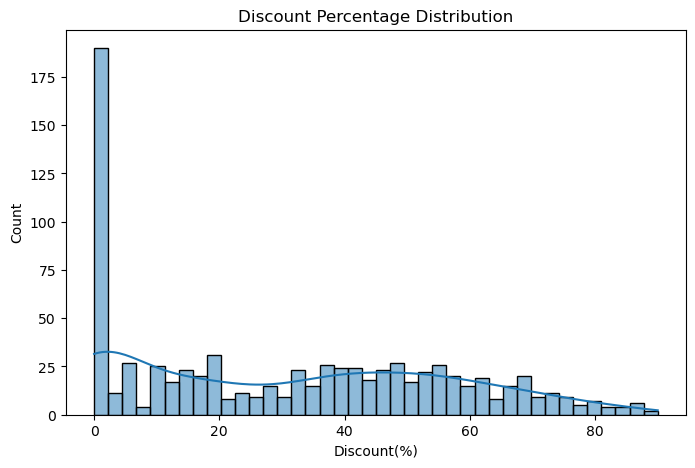

In [59]:
# discount distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Discount'], bins=40, kde=True)
plt.title('Discount Percentage Distribution')
plt.xlabel('Discount(%)')
plt.ylabel('Count')
plt.show()

## Rating Distribution

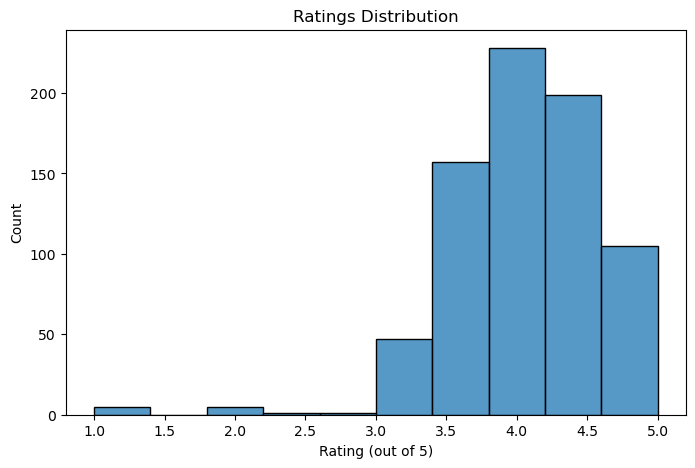

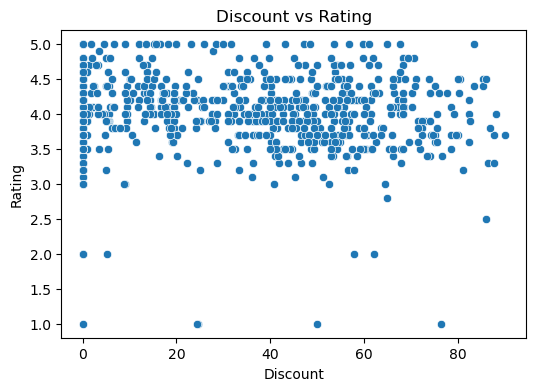

In [45]:
# rating distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=10, kde=False)
plt.title('Ratings Distribution')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Count')
plt.show()

# check correlation between rating discount
plt.figure(figsize=(6,4))
sns.scatterplot(x='Discount', y='Rating', data=df)
plt.title('Discount vs Rating')
plt.show()

## Correlation Analysis

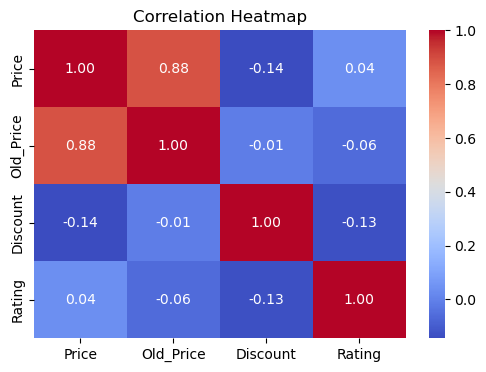

In [47]:
numeric_cols = ['Price', 'Old_Price', 'Discount', 'Rating']
corr = df[numeric_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Top Discounts and Drice Insights

In [54]:
# top 10 discounted products
print('TOP DISCOUNTED PRODUCTS: ')
top_discounted = df.sort_values(by='Discount', ascending=False).head(10)
print(top_discounted[['Name', 'Brand', 'Price', 'Old_Price', 'Discount', 'Rating']])

# top 10 expensive products
print('\nTOP EXPENSIVE PRODUCTS:')
top_expensive = df.sort_values(by='Price', ascending=False).head(10)
print(top_expensive[['Name', 'Price', 'Old_Price', 'Discount', 'Rating']])

TOP DISCOUNTED PRODUCTS: 
                                                  Name       Brand    Price  \
266  Kitchen Knife Sharpener, Repair Restore And Po...     Kitchen   1999.0   
397  Kiki NewGain Rechargeable Hair Cordless Clippe...        Kiki  15500.0   
332  2Black Darkening & Anti-dandruff Unisex Hair C...      2Black   1249.0   
662         Vehicle Engine Catalytic Converter Cleaner     Vehicle   4999.0   
388  Cerave Acne Control Cleanser With 2% Salicylic...      Cerave   3995.0   
340  Green Mask Stick Facial Mask For Black Spots &...       Green   2669.0   
527  Postpartum Breast Pump Manual High Suction Mil...  Postpartum   6636.0   
140  TWS Wireless Bluetooth Earpods - Bluetooth 5.3...         TWS   4800.0   
181  EAGEAT Wireless 2.4GHz Mice Rechargeable Mute-...      EAGEAT   3631.0   
169      EAGEAT Wireless 2.4GHz Mice Rechargeable Mute      EAGEAT   3631.0   

     Old_Price  Discount  Rating  
266    20000.0     90.00     3.7  
397   129000.0     87.98     4.0  

## Relationship between Old and New Price

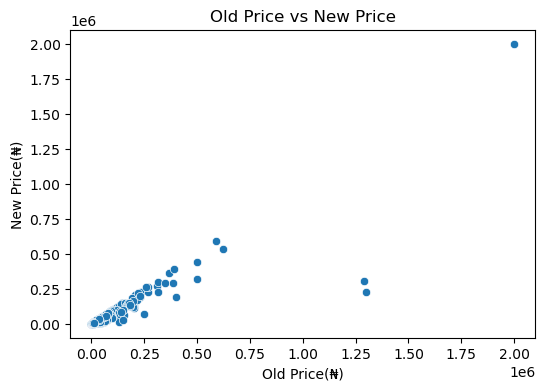

In [56]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Old_Price', y='Price', data=df)
plt.title('Old Price vs New Price')
plt.xlabel('Old Price(₦)')
plt.ylabel('New Price(₦)')
plt.show()

## Category based analysis

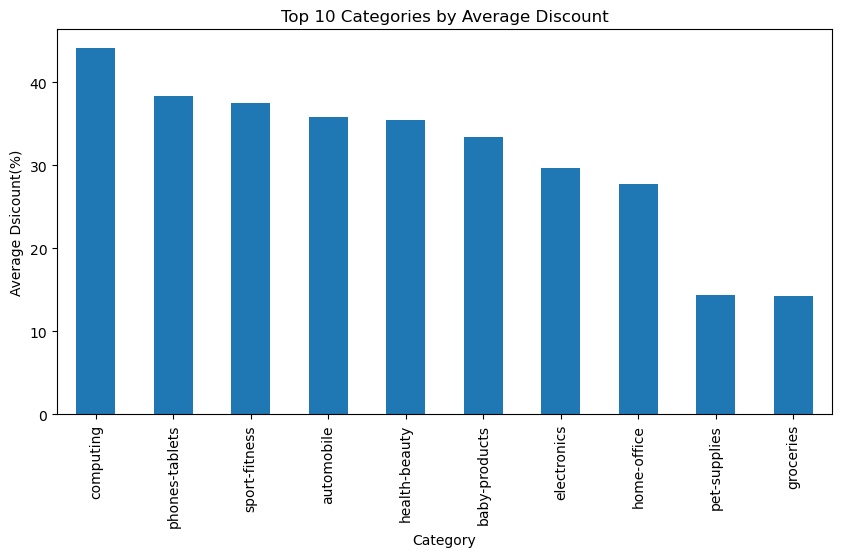

In [57]:
plt.figure(figsize=(10,5))
df.groupby('Category')['Discount'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Categories by Average Discount')
plt.ylabel('Average Dsicount(%)')
plt.show()

## Price vs Rating

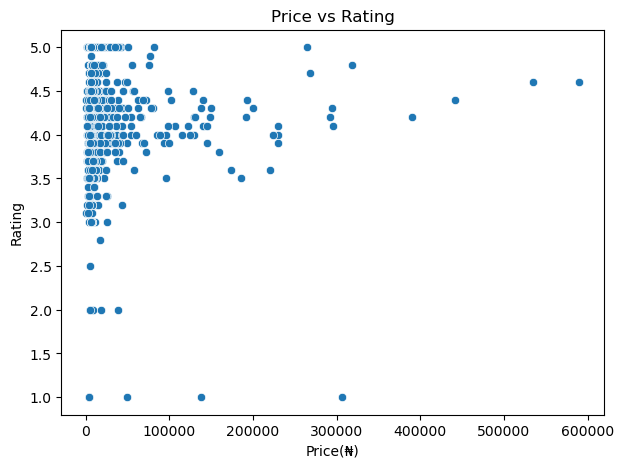

In [60]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Price', y='Rating', data=df)
plt.title('Price vs Rating')
plt.xlabel('Price(₦)')
plt.ylabel('Rating')
plt.show()

## Price Insights

price-sensitive customers are more active in low to mid-price categories.

Jumia can use price segmentation (budget, mid-range, premium) for better targeting.

## Discount Insights

Jumia relies on discounts to drive sales, but the majority of products have moderate discounts, suggesting normal price competition.

Categories like fashion and electronics usually show higher average discounts — ideal for marketing “Hot Deals” or “Flash Sales” promotions.

## Rating Insights

High-rated products can be featured as “Trusted Picks.”

Categories with few reviews might benefit from more customer review incentives to boost trust.

## Discount vs Rating

Discounting doesn’t automatically improve satisfaction — Jumia should ensure product quality, not just price cuts.

## Top Products and Discounts

Promote top-discounted items for traffic, but upsell high-value electronics to maximize profit margin.

Dynamic pricing models can be applied by category to improve balance.

## Category-Level Insights

Jumia can design targeted promotions per category:

“Mega Fashion Sale” for high-discount categories.

“Premium Tech Deals” for high-priced items.

“Everyday Essentials” for groceries with steady pricing.

## Final Business Recommendations

Focus Discounts Strategically — High discounts in fashion attract attention but may cut margins; apply moderate deals in tech.

Use Ratings for Trust Marketing — Promote high-rated items with tags like “Customer Favorite.”

Dynamic Pricing Engine — Adjust price and discount based on category demand and competition.

Encourage Reviews — Incentivize customers to rate products, especially in under-reviewed categories.

Data-Driven Promotions — Run category-specific campaigns based on price and discount analytics.

In [61]:
df.head()

,Category,Name,Brand,Price,Old_Price,Rating,Discount
0,phones-tablets,Ace Elec 20000 MAh Utra Slim Portable Power Ba...,Ace,6908.0,6908.0,3.7,0.00
1,phones-tablets,EASYPIE EasyPie 20000mAh Dual Fast Charge 64W ...,EASYPIE,6960.0,8618.0,3.6,19.24
2,phones-tablets,Philly 20000mAh Power Charging Bank Portable C...,Philly,6946.0,12971.0,3.6,46.45
3,phones-tablets,VIC ♛20000mAh Power Banks 74Wh Portable Charge...,VIC,4910.0,18830.0,3.4,73.92
4,phones-tablets,Oraimo Traveler 12 20000mAh 12W Power Bank,Oraimo,13635.0,22469.0,4.0,39.32


In [63]:
df.to_csv('jumia_cleaned.csv', index=False)